# Class Analysis

Each output class has the following label: df['next_status_60_row']  + df['next_status_60_column']
Associate each label a number

In [1]:
import pandas as pd

df = pd.read_csv('source/ais_data_next_status_60.csv')

In [2]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,class,column,course,date_time,index,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed
0,13,13,13.0,0.0,126.0,0.571429,2016-10-26 00:20:28+00:00,15568808.0,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,353.0,0.666667
1,14,14,14.0,0.0,126.0,0.571429,2016-10-26 00:23:29+00:00,15568993.0,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,353.0,0.666667
2,15,15,15.0,0.0,127.0,0.571429,2016-10-26 00:35:27+00:00,15569644.0,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,349.0,0.666667
3,16,16,16.0,0.0,128.0,0.571429,2016-10-26 00:56:17+00:00,15570855.0,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,342.0,0.333333
4,17,17,17.0,0.0,129.0,0.000000,2016-10-26 01:11:10+00:00,15571708.0,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,340.0,0.333333


In [3]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'index'], axis=1, inplace=True)

In [4]:
df.head()

,class,column,course,date_time,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed
0,0.0,126.0,0.571429,2016-10-26 00:20:28+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,353.0,0.666667
1,0.0,126.0,0.571429,2016-10-26 00:23:29+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,353.0,0.666667
2,0.0,127.0,0.571429,2016-10-26 00:35:27+00:00,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,349.0,0.666667
3,0.0,128.0,0.571429,2016-10-26 00:56:17+00:00,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,342.0,0.333333
4,0.0,129.0,0.000000,2016-10-26 01:11:10+00:00,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,340.0,0.333333


In [5]:
df['target_label'] = df['next_status_60_row'].astype(int).astype(str) + '_' +  df['next_status_60_column'].astype(int).astype(str)

In [6]:
df['target_label'].head()

0    340_129
1    340_129
2    340_129
3    342_128
4    348_127
Name: target_label, dtype: object

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
target = mlb.fit_transform([df['target_label'].tolist()])[0]

In [8]:
len(mlb.classes_)

2586

In [9]:
len(target)

2586

In [10]:
def get_target(x):
    return mlb.transform([x]).tolist()[0].index(1)

In [11]:
df['target'] = df['target_label'].apply(lambda x: get_target([x]))

In [12]:
df['target'].head()

0     675
1     675
2     675
3     794
4    1110
Name: target, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

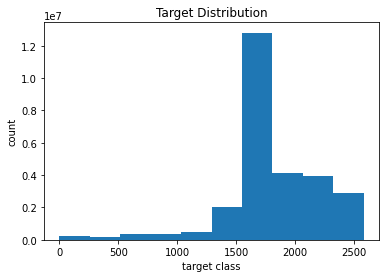

In [13]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["target"])

# set x/y labels and plot title
plt.pyplot.xlabel("target class")
plt.pyplot.ylabel("count")
plt.pyplot.title("Target Distribution")

In [14]:
target_distribution = df['target'].value_counts()

In [15]:
target_distribution.min()

1

In [16]:
target_distribution.max()

1575185

In [17]:
target_distribution.mean()

10596.84068058778

# Standardization

Standardize row and column. Use simple scaling

In [18]:
df['row'] = df['row']/df['row'].max()

In [19]:
df['column'] = df['column']/df['column'].max()

In [20]:
df.head()

,class,column,course,date_time,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed,target_label,target
0,0.0,0.78750,0.571429,2016-10-26 00:20:28+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,0.936340,0.666667,340_129,675
1,0.0,0.78750,0.571429,2016-10-26 00:23:29+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,0.936340,0.666667,340_129,675
2,0.0,0.79375,0.571429,2016-10-26 00:35:27+00:00,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,0.925729,0.666667,340_129,675
3,0.0,0.80000,0.571429,2016-10-26 00:56:17+00:00,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,0.907162,0.333333,342_128,794
4,0.0,0.80625,0.000000,2016-10-26 01:11:10+00:00,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,0.901857,0.333333,348_127,1110


In [43]:
import numpy as np

df['date_time'] = pd.to_datetime(df['date_time'])

df['hour_sin'] = np.sin(2 * np.pi * df['date_time'].dt.hour/24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['date_time'].dt.hour/24.0)

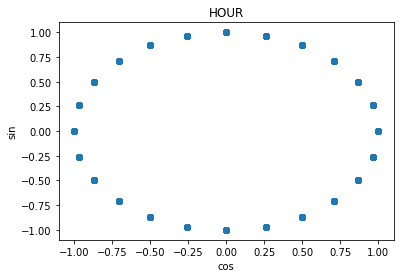

In [35]:
import matplotlib.pyplot as plt
plt.scatter(df['hour_cos'], df['hour_sin'])
plt.title('HOUR')
plt.xlabel('cos')
plt.ylabel('sin')
plt.show()

In [44]:
df['month_sin'] = np.sin(2 * np.pi * df['date_time'].dt.month/12.0)
df['month_cos'] = np.cos(2 * np.pi * df['date_time'].dt.month/12.0)

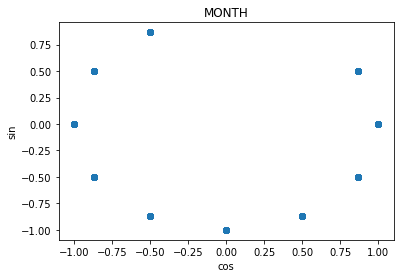

In [36]:
plt.scatter(df['month_cos'], df['month_sin'])
plt.title('MONTH')
plt.xlabel('cos')
plt.ylabel('sin')
plt.show()

In [45]:
df['day_sin'] = np.sin(2 * np.pi * df['date_time'].dt.dayofyear/365.0)
df['day_cos'] = np.cos(2 * np.pi * df['date_time'].dt.dayofyear/365.0)

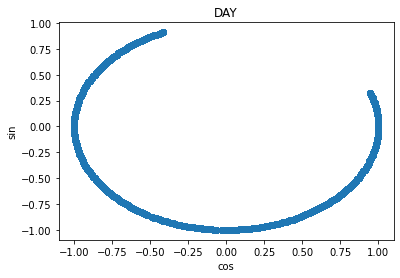

In [37]:
plt.scatter(df['day_cos'], df['day_sin'])
plt.title('DAY')
plt.xlabel('cos')
plt.ylabel('sin')
plt.show()

In [38]:
#df['hour_sin'] = df['hour_sin']/df['hour_sin'].max()
#df['hour_cos'] = df['hour_cos']/df['hour_cos'].max()
#df['month_sin'] = df['month_sin']/df['month_sin'].max()
#df['month_cos'] = df['month_cos']/df['month_cos'].max()
#df['day_sin'] = df['day_sin']/df['day_sin'].max()
#df['day_cos'] = df['day_cos']/df['day_cos'].max()

In [39]:
df.shape

(27403430, 20)

In [46]:
columns = ['class', 'course', 'speed', 'row','column','hour_sin','hour_cos','day_sin','day_cos', 'month_sin', 'month_cos','target', 'next_status_60_column', 'next_status_60_row']
df.to_csv('source/dataset_60.csv', columns = columns)

In [47]:
df.head()

,class,column,course,date_time,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed,target_label,target,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,0.0,0.78750,0.571429,2016-10-26 00:20:28+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,0.936340,0.666667,340_129,675,0.000000,1.000000,-0.866025,0.5,-0.899631,0.436651
1,0.0,0.78750,0.571429,2016-10-26 00:23:29+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,0.936340,0.666667,340_129,675,0.000000,1.000000,-0.866025,0.5,-0.899631,0.436651
2,0.0,0.79375,0.571429,2016-10-26 00:35:27+00:00,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,0.925729,0.666667,340_129,675,0.000000,1.000000,-0.866025,0.5,-0.899631,0.436651
3,0.0,0.80000,0.571429,2016-10-26 00:56:17+00:00,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,0.907162,0.333333,342_128,794,0.000000,1.000000,-0.866025,0.5,-0.899631,0.436651
4,0.0,0.80625,0.000000,2016-10-26 01:11:10+00:00,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,0.901857,0.333333,348_127,1110,0.258819,0.965926,-0.866025,0.5,-0.899631,0.436651


# Bibliography
* [Best practice for encoding datetime in machine learning](https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning)
* [What is a good way to transform Cyclic Ordinal attributes?](https://datascience.stackexchange.com/questions/5990/what-is-a-good-way-to-transform-cyclic-ordinal-attributes)